# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities_weather.csv"

# Range of latitudes and longitudes
lat_range = range(-90, 90, 5)
lon_range = range(-180, 180, 10)
lat_lon_list = []
for lat in lat_range:
    for lon in lon_range:
        lat_lon_list.append((lat, lon))
print(lat_lon_list)

[(-90, -180), (-90, -170), (-90, -160), (-90, -150), (-90, -140), (-90, -130), (-90, -120), (-90, -110), (-90, -100), (-90, -90), (-90, -80), (-90, -70), (-90, -60), (-90, -50), (-90, -40), (-90, -30), (-90, -20), (-90, -10), (-90, 0), (-90, 10), (-90, 20), (-90, 30), (-90, 40), (-90, 50), (-90, 60), (-90, 70), (-90, 80), (-90, 90), (-90, 100), (-90, 110), (-90, 120), (-90, 130), (-90, 140), (-90, 150), (-90, 160), (-90, 170), (-85, -180), (-85, -170), (-85, -160), (-85, -150), (-85, -140), (-85, -130), (-85, -120), (-85, -110), (-85, -100), (-85, -90), (-85, -80), (-85, -70), (-85, -60), (-85, -50), (-85, -40), (-85, -30), (-85, -20), (-85, -10), (-85, 0), (-85, 10), (-85, 20), (-85, 30), (-85, 40), (-85, 50), (-85, 60), (-85, 70), (-85, 80), (-85, 90), (-85, 100), (-85, 110), (-85, 120), (-85, 130), (-85, 140), (-85, 150), (-85, 160), (-85, 170), (-80, -180), (-80, -170), (-80, -160), (-80, -150), (-80, -140), (-80, -130), (-80, -120), (-80, -110), (-80, -100), (-80, -90), (-80, -80)

## Generate Cities List

In [45]:
# List for holding lat_lngs and cities
# Create a set of random lat and lng combinations
# Identify nearest city for each lat, lng combination
    # If the city is unique, then add it to a our cities list
# Print the city count to confirm sufficient count

city_list = []
for lat, lon in lat_lon_list:
    city = citipy.nearest_city(lat, lon)
    name = city.city_name
    country = city.country_code
    city_list.append(name + "," + country)
city_unique = list(set(city_list))
print(f"{len(city_unique)} unique cities selected.")

589 unique cities selected.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
df = pd.DataFrame()
df['City Name'] = ''
df['Country Code'] = ''
df['Latitude'] = ''
df['Longitude'] = ''
df['Max Temperature (F)'] = ''
df['Humidity (%)'] = ''
df['Cloudiness (%)'] = ''
df['Wind Speed (mph)'] = ''
df['UTC Datetime'] = ''

url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    'appid': weather_api_key,
    'units': 'imperial'
}
count = 0
for city in city_unique:
    params['q'] = city
    response = requests.get(url, params = params)
    if response.status_code == 200:
        data = response.json()
        df.loc[count, 'City Name'] = city.split(',')[0].title()
        df.loc[count, 'Country Code'] = city.split(',')[1].upper()
        df.loc[count, 'Latitude'] = data['coord']['lat']
        df.loc[count, 'Longitude'] = data['coord']['lon']
        df.loc[count, 'Max Temperature (F)'] = data['main']['temp_max']
        df.loc[count, 'Humidity (%)'] = data['main']['humidity']
        df.loc[count, 'Cloudiness (%)'] = data['clouds']['all']
        df.loc[count, 'Wind Speed (mph)'] = data['wind']['speed']
        df.loc[count, 'UTC Datetime'] = data['dt']
        
        print(f"Processing Record {count}, Latitude {data['coord']['lat']}: {city.split(',')[0].title()}")
        print(response.url.replace(weather_api_key,'*'*len(weather_api_key)))
        count += 1

print("-"*27)
print("Data Retrieval Complete")
print("-"*27)

Processing Record 0, Latitude -28.77: Geraldton
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=geraldton%2Cau
Processing Record 1, Latitude 49.97: Mitrofanovka
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=mitrofanovka%2Cru
Processing Record 2, Latitude 66.32: Egvekinot
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=egvekinot%2Cru
Processing Record 3, Latitude 69.45: Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=tuktoyaktuk%2Cca
Processing Record 4, Latitude -33.7: Chuy
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=chuy%2Cuy
Processing Record 5, Latitude -10.26: Jaguarari
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=jaguarari%2Cbr
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
df = df.infer_objects()
df.to_csv(output_data_file)
df.head(10)
# Extract relevant fields from the data frame
# Export the City_Data into a csv
# Show Record Count

,City Name,Country Code,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),UTC Datetime
0,Geraldton,AU,-28.77,114.60,50.00,71,0,8.05,1606768449
1,Mitrofanovka,RU,49.97,39.69,24.78,96,23,11.12,1606768653
2,Egvekinot,RU,66.32,-179.17,2.17,85,26,8.10,1606768653
3,Tuktoyaktuk,CA,69.45,-133.04,-2.20,84,75,11.41,1606768655
4,Chuy,UY,-33.70,-53.46,63.73,65,0,10.33,1606768655
5,Jaguarari,BR,-10.26,-40.20,77.29,51,99,6.55,1606768655
6,Vao,NC,-22.67,167.48,73.29,63,5,9.93,1606768655
7,Grootfontein,NA,-19.57,18.12,74.77,46,24,6.64,1606768655
8,Awjilah,LY,29.11,21.29,60.33,68,0,12.33,1606768655
9,Kirakira,SB,-10.45,161.92,83.26,73,100,6.20,1606768655


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

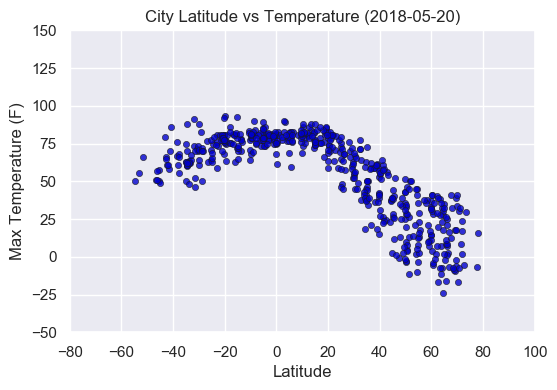

In [48]:
mpl.rcParams['figure.dpi']= 100
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']

sns.set(color_codes=True)
sns.regplot(data=df, x="Latitude", y="Max Temperature (F)", fit_reg=False, 
            scatter_kws={'facecolors': 'mediumblue', 'linewidths': 0.5, 'edgecolors': 'k', 's': 20})
plt.xlim((-80, 100))
plt.ylim((-50, 150))
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Temperature (2018-05-20)')
plt.savefig("City_vs_Temp.png")
plt.show()
None
#This graph is seeing the relationship between latiude and max temperature the closer the cities are to 0 the higher the temature

#### Latitude vs. Humidity Plot

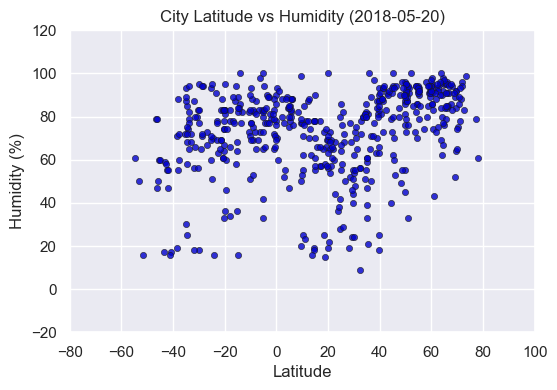

In [49]:
sns.set(color_codes=True)
sns.regplot(data=df, x="Latitude", y="Humidity (%)", fit_reg=False, 
            scatter_kws={'facecolors': 'mediumblue', 'linewidths': 0.5, 'edgecolors': 'k', 's': 20})
plt.xlim((-80, 100))
plt.ylim((-20, 120))
plt.title('City Latitude vs Humidity (2018-05-20)')
plt.savefig("City_vs_Humidity.png")
plt.show()
None
#This graph is seeing the relationship between latiude and Humidity there is no relationship between the two

#### Latitude vs. Cloudiness Plot

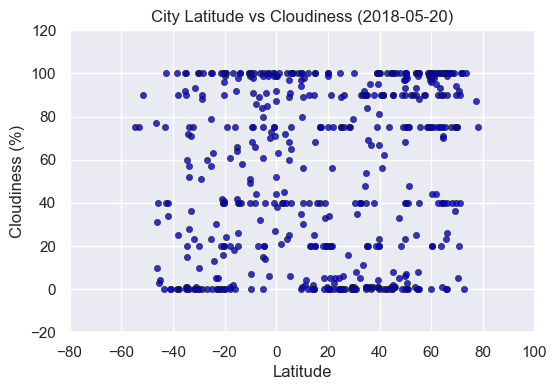

In [50]:
sns.set(color_codes=True)
sns.regplot(data=df, x="Latitude", y="Cloudiness (%)", fit_reg=False, 
            scatter_kws={'facecolors': 'mediumblue', 'linewidths': 0.5, 'edgecolors': 'k', 's': 20})
plt.xlim((-80, 100))
plt.ylim((-20, 120))
plt.title('City Latitude vs Cloudiness (2018-05-20)')
plt.savefig("City_vs_cloud.png")
plt.show()
None
#This graph is seeing the relationship between latiude and Cloudiness there is no relationship between the two

#### Latitude vs. Wind Speed Plot

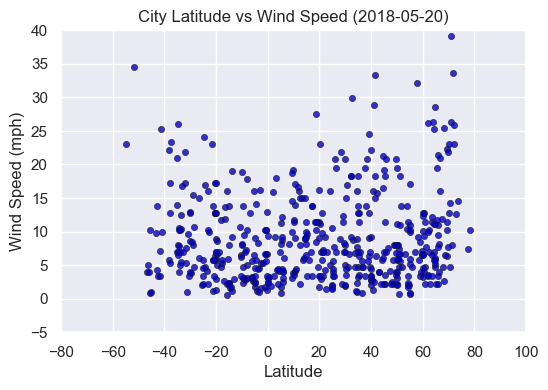

In [51]:
sns.set(color_codes=True)
sns.regplot(data=df, x="Latitude", y="Wind Speed (mph)", fit_reg=False, 
            scatter_kws={'facecolors': 'mediumblue', 'linewidths': 0.5, 'edgecolors': 'k', 's': 20})
plt.xlim((-80, 100))
plt.ylim((-5, 40))
plt.title('City Latitude vs Wind Speed (2018-05-20)')
plt.savefig("City_vs_wind.png")
plt.show()
None
#This graph is seeing the relationship between latiude and Wind Speed there is no relatiionship between the two

## Linear Regression

In [52]:
n_df = df.loc[df["Latitude"]>=0]
n_df.head(10)

,City Name,Country Code,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),UTC Datetime
1,Mitrofanovka,RU,49.97,39.69,24.78,96,23,11.12,1606768653
2,Egvekinot,RU,66.32,-179.17,2.17,85,26,8.10,1606768653
3,Tuktoyaktuk,CA,69.45,-133.04,-2.20,84,75,11.41,1606768655
8,Awjilah,LY,29.11,21.29,60.33,68,0,12.33,1606768655
10,Shakiso,ET,5.75,38.92,59.14,82,65,3.06,1606768655
11,Dakar,SN,14.69,-17.44,77.00,78,0,9.17,1606768434
12,Nuuk,GL,64.18,-51.72,23.00,62,40,25.28,1606768656
14,Spas-Klepiki,RU,55.13,40.18,28.99,90,100,11.01,1606768656
16,Sosua,DO,19.77,-70.52,82.40,69,20,11.41,1606768656
19,Bageshwar,IN,29.85,79.77,51.85,44,0,1.95,1606768656


In [53]:
s_df = df.loc[df["Latitude"]<0]
s_df.head(10)

,City Name,Country Code,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),UTC Datetime
0,Geraldton,AU,-28.77,114.60,50.00,71,0,8.05,1606768449
4,Chuy,UY,-33.70,-53.46,63.73,65,0,10.33,1606768655
5,Jaguarari,BR,-10.26,-40.20,77.29,51,99,6.55,1606768655
6,Vao,NC,-22.67,167.48,73.29,63,5,9.93,1606768655
7,Grootfontein,NA,-19.57,18.12,74.77,46,24,6.64,1606768655
9,Kirakira,SB,-10.45,161.92,83.26,73,100,6.20,1606768655
13,Presidencia Roque Saenz Pena,AR,-26.79,-60.44,76.78,73,60,6.08,1606768656
15,Kununurra,AU,-15.77,128.73,80.60,94,75,2.24,1606768512
17,Iquique,CL,-20.22,-70.14,68.00,64,90,6.93,1606768449
18,Tres Arroyos,AR,-38.37,-60.28,76.12,19,0,5.77,1606768656


In [54]:
def linearplot(x_values,y_values,y_axis,coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coord,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_axis)
    print(f"The r-squared is: {rvalue}")
    plt.show()

The r-squared is: -0.8615038355865543


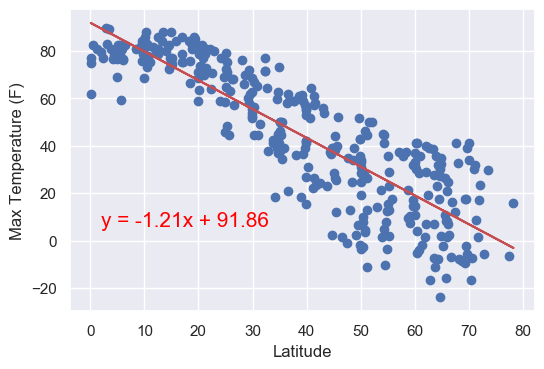

In [55]:
x_values = n_df["Latitude"]
y_values = n_df["Max Temperature (F)"]
linearplot(x_values,y_values,"Max Temperature (F)",(2,6))
#This graph is seeing the relationship between latiude and maxtemperature north of 0 latitude the further away from 0 the lower the tempatutre

The r-squared is: 0.631817423197919


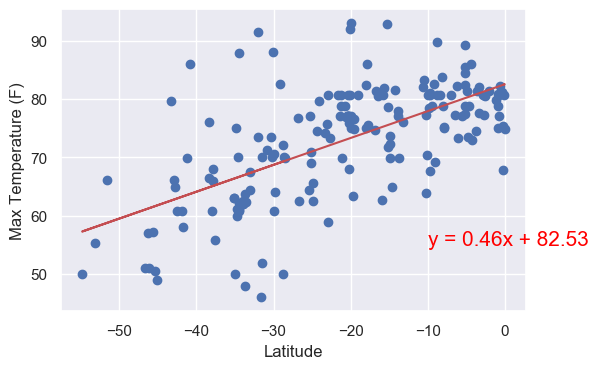

In [56]:
x_values = s_df["Latitude"]
y_values = s_df["Max Temperature (F)"]
linearplot(x_values,y_values,"Max Temperature (F)",(-10,55))
#This graph is seeing the relationship between latiude and maxtemperature south of 0 latitude the further away from 0 the lower the tempatutre

The r-squared is: 0.40563093165867087


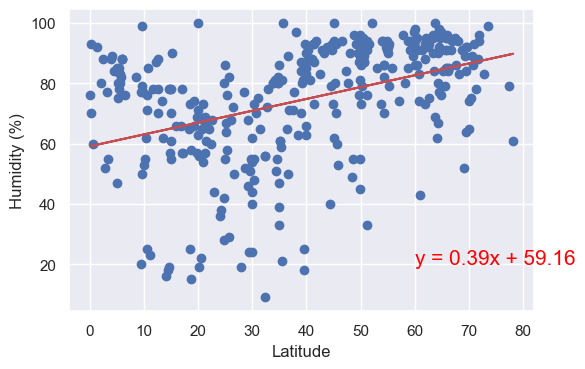

In [57]:
x_values = n_df["Latitude"]
y_values = n_df["Humidity (%)"]
linearplot(x_values,y_values,"Humidity (%)",(60,20))
#This graph is seeing the relationship between latiude and Humidity north of 0 latitude and there is no relationship

The r-squared is: 0.3561178185042735


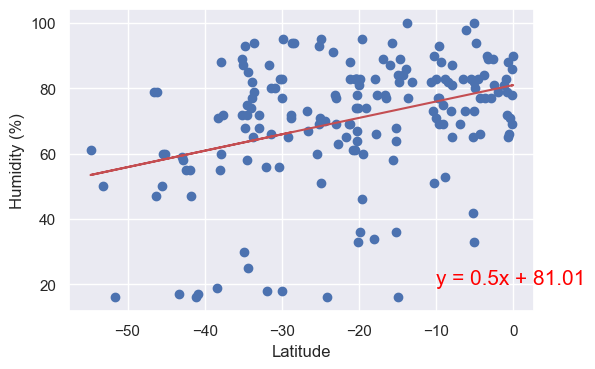

In [58]:
x_values = s_df["Latitude"]
y_values = s_df["Humidity (%)"]
linearplot(x_values,y_values,"Humidity (%)",(-10,20))
#This graph is seeing the relationship between latiude and Humidity south of 0 latitude and there is no relationship

The r-squared is: 0.22109524231542874


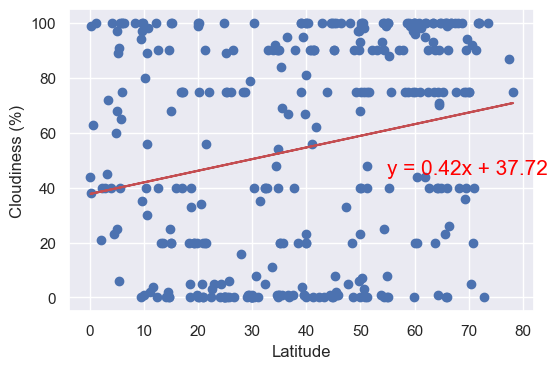

In [59]:
x_values = n_df["Latitude"]
y_values = n_df["Cloudiness (%)"]
linearplot(x_values,y_values,"Cloudiness (%)",(55,45))
#This graph is seeing the relationship between latiude and Cloudiness north of 0 latitude and the further away the less clouds

The r-squared is: 0.2553885677192387


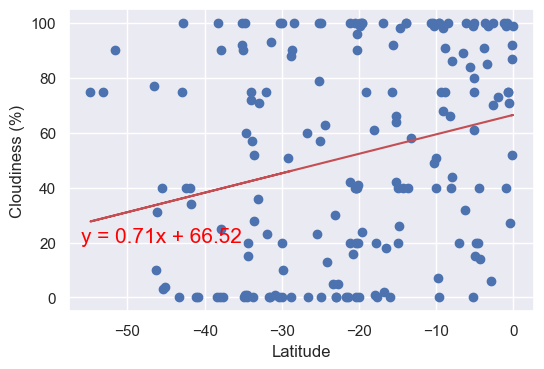

In [60]:
x_values = s_df["Latitude"]
y_values = s_df["Cloudiness (%)"]
linearplot(x_values,y_values,"Cloudiness (%)",(-56,20))
#This graph is seeing the relationship between latiude and Humidity south of 0 latitude and the further away the less the clouds

The r-squared is: 0.16297704248575576


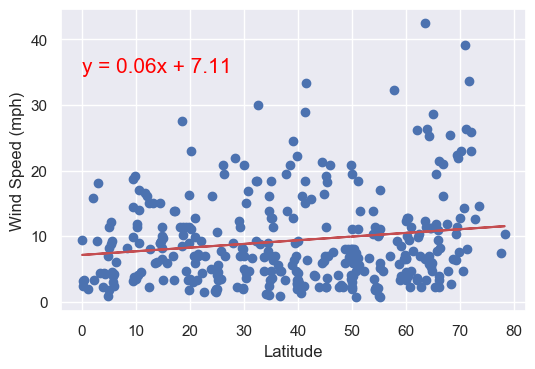

In [61]:
x_values = n_df["Latitude"]
y_values = n_df["Wind Speed (mph)"]
linearplot(x_values,y_values,"Wind Speed (mph)",(0,35))
#This graph is seeing the relationship between latiude and windspeed north of 0 latitude and there is no relationship

The r-squared is: -0.3297446084674579


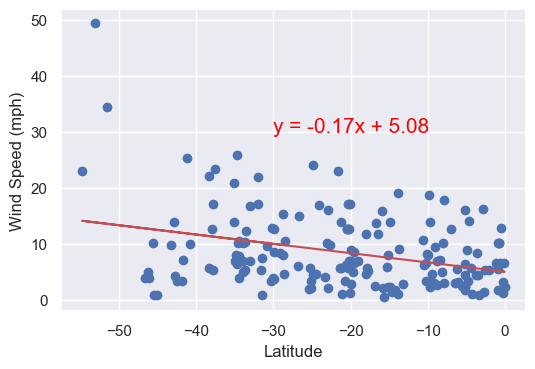

In [62]:
x_values = s_df["Latitude"]
y_values = s_df["Wind Speed (mph)"]
linearplot(x_values,y_values,"Wind Speed (mph)",(-30,30))
#This graph is seeing the relationship between latiude and windspeed north of 0 latitude and there is no relationship